# ---- Final Project Data Science Hacktiv 8 ---

Author : Noer Ardiansyah Laksana

## 1. Introduction

Pada project ini, saya akan memprediksi kemungkinan seseorang terkena diabetes menggunakan data yang berada di link berikut :

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

Data tersebut berisi beberapa informasi seperti :
1. Masa Kehamilan
2. Tingkat Glukosa
3. Tekanan darah
4. Gumpalan lemak pada kulit
5. Tingkat penyuntikan insulin
6. Tingkat ideal berat badan
7. Umur
8. Status diabetes

Data ini hanya berisi pasien wanita

### -- Goal --
Pada final project ini, saya ingin membangun sebuah model yang dapat memprediksikan apakah seseorang dengan beberapa faktor diatas terkena diabetes atau tidak.

note: saya akan menggunakan model machine learning random forest dan naive bayes kemudian akan membandingkan hasilnya

## 2. Import Package yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing # label encoder
from sklearn.neighbors import KNeighborsClassifier #Import knearest neighbors Classifier model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB #Import Gaussian Naive Bayes model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import sklearn.tree as tree #import visualizing decision tree
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier #Import Random Forest Model
from sklearn import svm #Import svm model
import seaborn as sns

# 3. Data Loading, Explorasi, dan Data Analysis

In [2]:
df = pd.read_csv("diabetes.csv")
print('Data Sudah terbaca')

Data Sudah terbaca


In [3]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
df.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

##### Data memiliki 768 baris dan 10 kolom yang menjadi indikator pasien terkena diabetes atau tidak

outcome yang ada pada kolom dataset menunjukan bahwa pasien terkena diabetes atau tidak, angka 0 menunjukan bahwa pasien tidak terkena diabetes, dan angka 1 menunjukan bahwa pasien terkena diabetes. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Melihat missing values pada dataset yang akan digunakan

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

--- Insight --- 

Pada bagian ini, tertlihat bahwa tidak ada missing values yang terjadi pada dataset yang akan digunakan.

### Data Cleansing

Terlihat memang seperti tidak ada missing values pada data tersebut, namun nilai nol tidak makesanse pada kasus ini maka kita ganti nilai nol menjadi NaN

In [8]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Karena NaN akan menggangu proses pengolahan data maka mari kita ganti data tersebut

In [9]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

In [10]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### 3.1 Visualisasi Data

In [11]:
df_copy['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

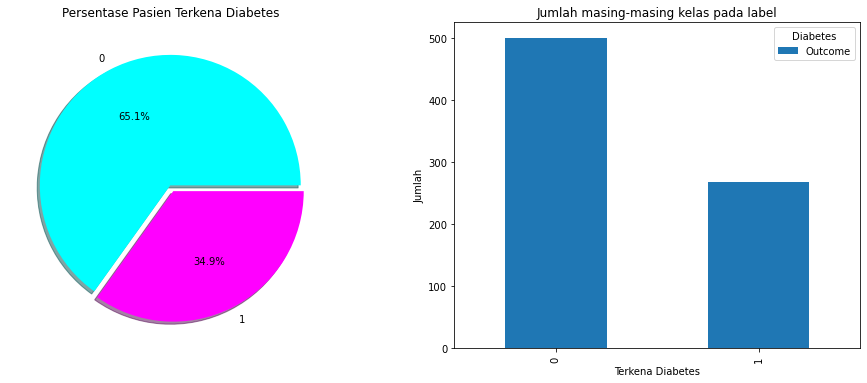

In [12]:
fig, ax = plt.subplots(1,2,figsize=(16,6))


df_copy['Outcome'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.05], 
    cmap='cool',
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Persentase Pasien Terkena Diabetes')
ax[0].set_ylabel('')


df_copy.groupby('Outcome').agg({'Outcome':'count'}).plot(
    kind='bar',
    ax=ax[1]
)
ax[1].set_title('Jumlah masing-masing kelas pada label')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Terkena Diabetes')
ax[1].legend(title='Diabetes')


Terlihat pada grafik yang ditampilkan diatas, pada dataset yang digunakan pada project ini terjadi imbalanced data dimana banyak pasien yang tidak terkena diabetes dibandingkan pasien yang terkena diabetes.

#### Mencoba Eksplorasi Lebih Dalam

Text(0, 0.5, '')

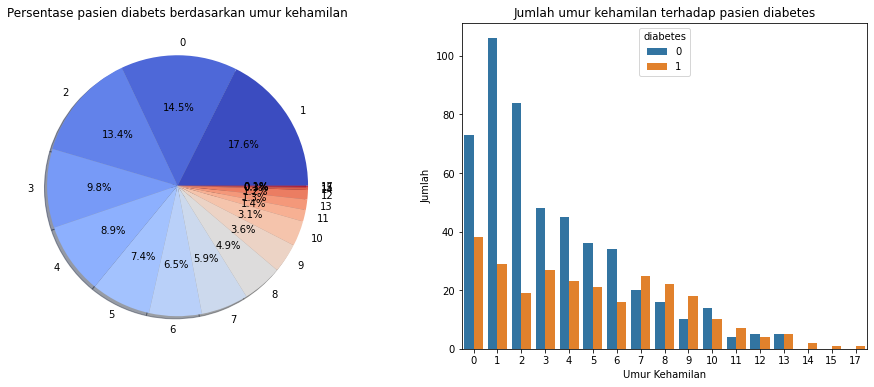

In [13]:
ig, ax = plt.subplots(1,2,figsize=(16,6))


sns.countplot(
    x='Pregnancies',
    hue='Outcome',
    data=df_copy
)
ax[1].set_title('Jumlah umur kehamilan terhadap pasien diabetes')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Umur Kehamilan')
ax[1].legend(title='diabetes')


df_copy['Pregnancies'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%', 
    cmap='coolwarm',
    shadow=True,
)
ax[0].set_title('Persentase pasien diabets berdasarkan umur kehamilan')
ax[0].set_ylabel('')

Terlihat dari grafik diatas cukup mengejutkan, bahwa presentase diabetes pada pasien perempuan terjadi ketika perempuan didominasi usia kehamilan 1 bulan dan disusul pada usian kehamilan 0 bulan.

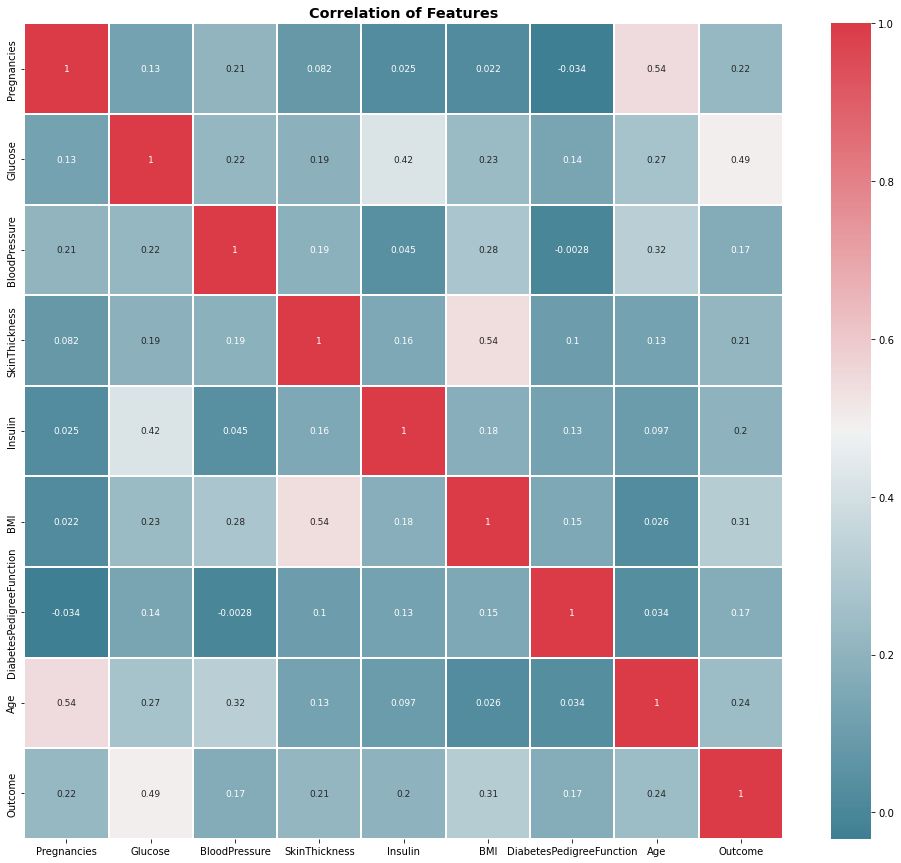

In [14]:
plt.figure(figsize=(17, 15))
plt.title('Correlation of Features', fontsize='x-large', fontweight='bold')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_copy.corr(), annot=True, cmap=cmap, linewidths=.1, annot_kws={'size': 9})
plt.show()

# 4. Pendefinisian Model

Model yang akan digunakan pada project ini adalah Random Forest dan Naive Bayes. Karena 2 model tersebut memiliki proses yang relatif cepat, namun memiliki hasil yang cukup berbeda jauh siginfikan. Oleh karena itu, mari kita bandingkan pada project ini.

### 4.1 Split data

Kita akan memakai 80:20 perbandingan, dengan 80% data latih dan 20% data uji.

In [15]:
x = df_copy.drop('Outcome', 1)
y = df_copy.Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

print('Training set size:', x_train.shape)
print('Test set size:', x_test.shape)

Training set size: (614, 8)
Test set size: (154, 8)


C:\Users\user\AppData\Local\Temp/ipykernel_16776/2999370837.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df_copy.drop('Outcome', 1)


### 4.2 Data Scaling

In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

display(x_test_scaled)

array([[-5.65086849e-01, -1.33425075e+00, -1.02904670e+00, ...,
        -7.17662272e-01, -5.44425857e-01, -7.09135053e-01],
       [-8.56407862e-01,  2.53482893e-01, -2.10919567e-01, ...,
        -9.81802522e-01, -2.72690136e-04, -9.66468931e-01],
       [-1.14772887e+00, -4.91779839e-01, -1.02904670e+00, ...,
        -9.08430230e-01, -1.01383271e+00, -8.80690971e-01],
       ...,
       [-1.14772887e+00, -7.18598932e-01,  1.26170927e+00, ...,
         2.08515927e+00,  1.46475507e+00, -1.94467296e-01],
       [ 3.08876187e-01, -1.43145894e+00, -2.01079926e+00, ...,
         1.62805228e-01,  5.43880476e-01, -7.09135053e-01],
       [ 1.75551750e-02,  3.83093803e-01, -4.72941404e-02, ...,
        -1.28996615e+00, -5.83293940e-01,  2.29309353e+00]])

# 5. Proses Latih Model

## 5.1 Naive Bayes

In [17]:
model_GNB = GaussianNB()
model_GNB.fit(x_train_scaled, y_train)
y_pred_GNB = model_GNB.predict(x_test_scaled)

print(classification_report(y_test, y_pred_GNB), end='')

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154


In [18]:
print('Nilai akurasi pembuatan model naive bayes menggunakan data training (satuann persen) adalah', model_GNB.score(x_train_scaled, y_train) * 100)
print('Nilai akurasi pembuatan model naive bayes menggunakan data Uji (satuann persen) adalah', model_GNB.score(x_test_scaled, y_test)* 100)

Nilai akurasi pembuatan model naive bayes menggunakan data training (satuann persen) adalah 76.0586319218241
Nilai akurasi pembuatan model naive bayes menggunakan data Uji (satuann persen) adalah 75.32467532467533


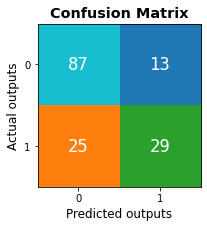

In [19]:
def cmplot(cm):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(cm, cmap='tab10')
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', fontsize='large')
    ax.set_ylabel('Actual outputs', fontsize='large')
    ax.xaxis.set(ticks=range(2))
    ax.yaxis.set(ticks=range(2))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white', 
                    fontsize='xx-large', fontfamily='monospace')
    plt.title('Confusion Matrix', fontsize='x-large', fontweight='bold')
    plt.show()


cmplot(confusion_matrix(y_test, y_pred_GNB))

## 5.2 Random Forest

In [20]:
model_RF = RandomForestClassifier(random_state=11)
model_RF.fit(x_train_scaled, y_train)
y_pred_RF = model_RF.predict(x_test_scaled)

print(classification_report(y_test, y_pred_RF), end='')

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154


In [21]:
print('Nilai akurasi pembuatan model random forest menggunakan data training (satuann persen) adalah', model_RF.score(x_train_scaled, y_train) * 100)
print('Nilai akurasi pembuatan model random forest menggunakan data Uji (satuann persen) adalah', model_RF.score(x_test_scaled, y_test)* 100)

Nilai akurasi pembuatan model random forest menggunakan data training (satuann persen) adalah 100.0
Nilai akurasi pembuatan model random forest menggunakan data Uji (satuann persen) adalah 72.72727272727273


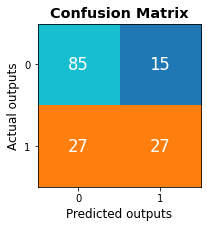

In [22]:
cmplot(confusion_matrix(y_test, y_pred_RF))

In [23]:
print("Naive Bayes:", model_GNB.score(x_test_scaled, y_test)* 100)
print("Random Forest:", model_RF.score(x_test_scaled, y_test)* 100)

Naive Bayes: 75.32467532467533
Random Forest: 72.72727272727273


## 6. Uji Model

### 6.1 Menggunakan Naive Bayes

Xn [Umur Kehamilan, TIngkat Glukosa, Blood Preasure, Tingkat Ketebalan Kulit, Insulin, BMI, Diabetes PedigreeFunction, Umur ]

In [29]:
a = int(input('Berapa usia kehamilan kamu:'))
b = int(input('Berapa tingkat glukosa kamu:'))
c = int(input('Berapa tekanan darah kamu:'))
d = int(input('Masukan ketebalan kulit:'))
e = int(input('Dosis insulin yang telah disuntikan:'))
f = float(input('Tingkat BMI:'))
g = float(input('Masukan diabetes pedigree function'))
h = int(input('Masukan umur kamu:'))

Xn = [[a, b , c, d, e, f, g, h]]
out = model_GNB.predict(Xn)
if out == 0:
    print("No Diabetes")
else:
    print("Diabetes")

Diabetes


### 6.2 Menggunakan Random Forest

In [25]:
a = int(input('Berapa usia kehamilan kamu:'))
b = int(input('Berapa tingkat glukosa kamu:'))
c = int(input('Berapa tekanan darah kamu:'))
d = int(input('Masukan ketebalan kulit:'))
e = int(input('Dosis insulin yang telah disuntikan:'))
f = float(input('Tingkat BMI:'))
g = float(input('Masukan diabetes pedigree function'))
h = int(input('Masukan umur kamu:'))

Xn = [[a, b , c, d, e, f, g, h]]
out = model_RF.predict(Xn)
if out == 0:
    print("No Diabetes")
else:
    print("Diabetes")

Diabetes


## 7. Kesimpulan

Dengan menggunakan dua metode diatas, terlihat model yang dibangun hanya memiliki tingkat akurasi sekitar 70% keatas. Namun hal yang unik adalah, pada kasus ini model naive bayes memiliki tingkat akurasi yang cukup lebih baik daripada random forest.

Kedua model mampu memprediksi apakah satu pasien dengan kategori terentu, sesuai indikator yang ada terkena diabetes atau tidak. Namun, prediksi tersebut masih dapat diragukan mengingat model yang dibangun hanya mampu memprediksi suatu kasus dengan tingkat kebenaran 70%.

